# Assignment 4: MultiLayer Perceptron Implementation

This notebook demonstrates the implementation and validation of a multi-layer perceptron (MLP) neural network. We will explore the following:
1. Step Function
2. Sigmoid activation function
3. Softmax activation function
4. Identity function
5. Example tests to validate the implementation
6. MultiLayer Perceptron 

---

## Submission Details

| **Name**        | **UMID**     |
|-----------------|--------------|
| Srishti Kachhara| 08489024     |



In [25]:
import matplotlib.pyplot as plt
import numpy as np

## Step Activation Function

The step function is a simple activation function that outputs a 0 or 1, based on whether the input is less than or greater than a certain threshold. It's often used in early neural networks but lacks the flexibility of functions like sigmoid or ReLU for more complex tasks.

In this implementation, we assume the threshold is zero. The function outputs:



$$
u(s) = 
\begin{cases} 
0 & \text{if } s \leq 0 \\
1 & \text{if } s > 0 
\end{cases}
$$


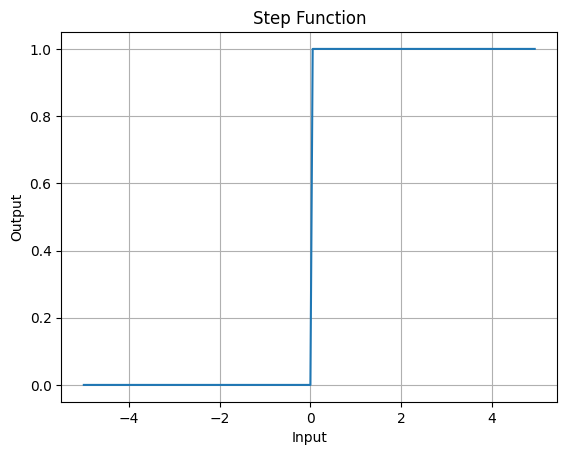

In [26]:
def step_function(s):
    """
    Step activation function. Outputs 0 if the input is less than or equal to 0,
    and 1 if the input is greater than 0.
    
    Parameters:
    -----------
    s : float or np.array
        Input value or array.
        
    Returns:
    --------
    float or np.array
        Output after applying the step function: 0 or 1.
    """
    return np.array(s > 0).astype(int)

# Example 
x = np.arange(-5, 5, 0.05)
y = step_function(x)
y
plt.plot(x, y)
plt.title('Step Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()


## Sigmoid Activation Function

The sigmoid function is widely used in neural networks as an activation function, especially in binary classification problems. The function squashes any input value to a range between 0 and 1, making it useful for converting outputs into probabilities.

The formula for the sigmoid function is:

The sigmoid function is defined as:
$$ \sigma(s) = \frac{1}{1 + e^{-s}} $$

One drawback of the sigmoid function is that it can cause gradients to vanish when inputs are far from zero, leading to slower learning.


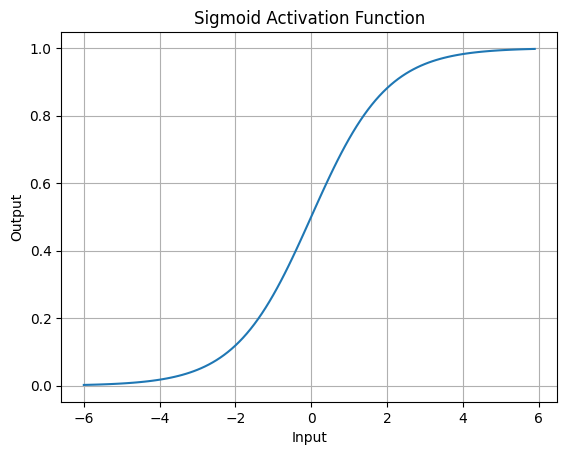

In [27]:
def sigmoid(s):
    """
    Sigmoid activation function. Outputs values between 0 and 1.
    
    Parameters:
    -----------
    s : float or np.array
        Input value or array.
        
    Returns:
    --------
    float or np.array
        Output after applying the sigmoid function.
    """
    return 1/(1 + np.exp(-s))

# Example
x = np.arange(-6, 6, 0.1)
y = sigmoid(x)
y
plt.plot(x, y)
plt.title('Sigmoid Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()


## Softmax Activation Function

The softmax function is used in multi-class classification problems to convert raw output values (logits) from a model into probabilities. The output probabilities sum up to 1, making it useful for interpreting the outputs as probabilities of belonging to each class.

The formula for the softmax function is:

The softmax function, denoted as $\sigma$, for a vector $\mathbf{z}$ is given by:

$$
\sigma(\mathbf{z})_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}
$$

This function helps to stabilize the computation by subtracting the maximum value from the logits, preventing overflow in exponential calculations.


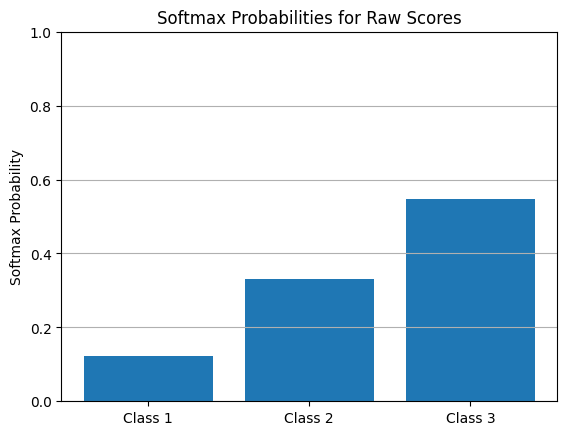

In [28]:
def softmax(y):
    """
    Softmax activation function. Converts raw scores into probabilities.
    
    Parameters:
    -----------
    y : np.array
        Array of raw output values (logits).
        
    Returns:
    --------
    np.array
        Normalized probabilities for each class based on the input values.
    """
    m = np.max(y) 
    a = np.exp(y - m) 
    s = np.sum(a)

    return a / s

# Example 
y_values = np.array([1.5, 2.5, 3.0])
softmax_values = softmax(y_values)
plt.bar(range(len(y_values)), softmax_values, tick_label=['Class 1', 'Class 2', 'Class 3'])
plt.ylabel('Softmax Probability')
plt.title('Softmax Probabilities for Raw Scores')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


2 layer as describe during the lecture 


In [29]:
x = np.array([1.3, 3.141592]) 
w1 = np.array([[0.7, 0.9, 0.3], [0.5, 0.4, 0.1]])
b1 = np.array([1, 1, 1])

a1 = np.dot(x, w1) + b1
z1 = sigmoid(a1)

w2 = np.array([[0.2, 0.3], [0.4, 0.5], [0.22, 0.1234]])
b2 = np.array([0.5, 0.5])

a2 = np.dot(z1, w2) + b2

z2 = sigmoid(a2)
z2

array([0.78032733, 0.79894445])

In [30]:
def identity_function(z):
    return z

y = identity_function(z2)
y

array([0.78032733, 0.79894445])

## MultiLayer Perceptron Implementation

In this section, we will implement a simple MultiLayer Perceptron (MLP) using a function-based approach. The MLP consists of three layers: an input layer, one hidden layer, and an output layer. Each layer is represented using weight matrices and bias vectors.




### Network Initialization

The `init_network` function initializes the MLP with predefined weights and biases. 

The weights and biases for each layer are as follows:
- **Layer 1** (Input to Hidden)
  - Weights (`w1`): `[[0.7, 0.9, 0.3], [0.5, 0.4, 0.1]]`
  - Biases (`b1`): `[1, 1, 1]`
  
- **Layer 2** (Hidden to Hidden)
  - Weights (`w2`): `[[0.2, 0.3], [0.4, 0.5], [0.22, 0.1234]]`
  - Biases (`b2`): `[0.5, 0.5]`
  
- **Layer 3** (Hidden to Output)
  - Weights (`w3`): `[[0.7, 0.1], [0.123, 0.314]]`
  - Biases (`b3`): `[0.1, 0.2]`
  


In [31]:
def init_network():
    """
    Initialize the MultiLayer Perceptron (MLP) with predefined weights and biases.

    Returns:
    --------
    dict
        A dictionary containing the weights and biases for each layer of the MLP.
    """
    net = {}
    # Layer 1
    net['w1'] = np.array([[0.7, 0.9, 0.3], [0.5, 0.4, 0.1]])
    net['b1'] = np.array([1, 1, 1])
    
    # Layer 2
    net['w2'] = np.array([[0.2, 0.3], [0.4, 0.5], [0.22, 0.1234]])
    net['b2'] = np.array([0.5, 0.5])
    
    # Layer 3 <-- Output
    net['w3'] = np.array([[0.7, 0.1], [0.123, 0.314]])
    net['b3'] = np.array([0.1, 0.2])

    return net

### Forward Propagation

The `forward` function computes the output of the network for a given input `x`. This function performs the following operations:
1. Calculates the weighted sum of inputs for each layer.
2. Applies the sigmoid activation function for the hidden layers.
3. Outputs the final result using the identity function.

In [32]:
def forward(net, x):
    """
    Perform forward propagation through the MultiLayer Perceptron (MLP).

    Parameters:
    -----------
    net : dict
        A dictionary containing the weights and biases for each layer of the MLP.
    x : np.array
        The input data to the network.

    Returns:
    --------
    np.array
        The output of the MLP after forward propagation.
    """
    w1, w2, w3 = net['w1'], net['w2'], net['w3']
    b1, b2, b3 = net['b1'], net['b2'], net['b3']

    # Calculate activations for layer 1
    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    # Calculate activations for layer 2
    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    # Calculate activations for layer 3 (output layer)
    a3 = np.dot(z2, w3) + b3
    y = identity_function(a3)  

    return y

### Testing the Network

In [33]:
network = init_network()
x = np.array([0.123, 0.49856265294540])
y = forward(network, x)
y

array([0.72514254, 0.51835334])

In [34]:
x = np.array([0.95986096756805687, 0.34673846238957])
y = forward(network, x)
y

array([0.73442144, 0.52342796])

In [35]:
x = np.array([0.86593485, 0.86593485])
y = forward(network, x)
y

array([0.73593814, 0.52429289])

## Class MultiLayer Perceptron Implementation

I implemented the class MultiLayer Perceptron in the `multilayer_perceptron.py` file and tested the class in `module4.py`. Please refer to these files for details on the implementation and testing.
